# CRM - Análise de Campanha de Marketing

In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.max_columns', None)
sns.set()

In [17]:
# draw multiples plot from a specific seaborn function
def multi_plot(df, cols, func, total_cols=4, **kwargs):
    total_rows = math.ceil(len(cols) / 4)
    fig, axes = plt.subplots(total_rows, total_cols, figsize=(24,6))
    
    for i, col in enumerate(cols):
        ax = axes.ravel()
        func(ax=ax[i], data=df, x=col, **kwargs)

    fig.tight_layout()

In [13]:
df = pd.read_csv('ml_project1_data_clusters.csv', sep=';')

In [25]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'clusters']
df_prods = df[cols].melt(id_vars='clusters', var_name='products')

In [28]:
df_prods

,clusters,products,value
0,1,MntWines,635
1,0,MntWines,11
2,1,MntWines,426
3,0,MntWines,11
4,2,MntWines,173
...,...,...,...
13435,2,MntGoldProds,247
13436,2,MntGoldProds,8
13437,1,MntGoldProds,24
13438,2,MntGoldProds,61


In [32]:
df_prods = df_prods.groupby(['clusters', 'products']).sum().reset_index()
fig = px.bar(df_prods, x="clusters", y="value",
             color='products', barmode='group',
             height=400, title='Valor Gasto de cada Cluster por Produto')
fig.show()

<AxesSubplot:xlabel='clusters', ylabel='value'>

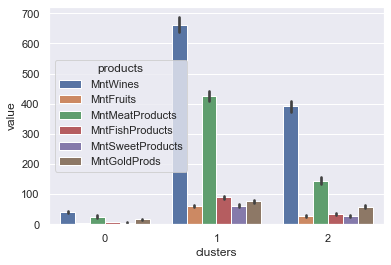

In [29]:
sns.barplot(data=df_prods, x='clusters', y='value', hue='products')

In [33]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,DaysCustomer,TotalChild,Monetary,MntPurchase,MntAccepted,clusters
0,5524,1957,1,0,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8.0,10.0,4.0,7,0,0,0,0,0,0,3,11,1,57,760,0,1617.0,21.0,0,1
1,2174,1954,1,0,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1.0,1.0,2.0,5,0,0,0,0,0,0,3,11,0,60,210,2,27.0,8.0,0,0
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8.0,2.0,10.0,4,0,0,0,0,0,0,3,11,0,49,409,0,776.0,16.0,0,1
3,6182,1984,1,1,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2.0,0.0,4.0,6,0,0,0,0,0,0,3,11,0,30,236,1,53.0,10.0,0,0
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5.0,3.0,6.0,5,0,0,0,0,0,0,3,11,0,33,258,1,422.0,14.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,1,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9.0,3.0,4.0,5,0,0,0,0,0,0,3,11,0,47,478,1,1341.0,12.0,0,2
2236,4001,1946,4,1,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8.0,2.0,5.0,7,0,0,0,1,0,0,3,11,0,68,116,3,444.0,14.0,1,2
2237,7270,1981,1,0,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2.0,3.0,13.0,6,0,1,0,0,0,0,3,11,0,33,252,0,1241.0,22.0,1,1
2238,8235,1956,3,1,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6.0,5.0,10.0,3,0,0,0,0,0,0,3,11,0,58,253,1,843.0,18.0,0,2


In [39]:
pie = df.groupby('Response')['ID'].count().reset_index()
fig = px.pie(pie, values='ID', names='Response', title='Proporção de Respostas positivas na Última Camapnha', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()